<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lab)

***

Week 2 | Lab 6.1

## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!

ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')

In [3]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [4]:
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

### 2. What is the breakdown of dtypes in our dataframe?

In [5]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 


In [6]:
ufo['City'].nunique()

13504

In [45]:
ufo['Colors Reported'].nunique()

31

In [51]:
ufo['Shape Reported'].nunique()

27

In [53]:
ufo['State'].nunique()

52

|                                                | City      | Colors Reported | Shape Reported  | State                         | Time            |
|------------------------------------------------|-----------|-----------------|-----------------|-------------------------------|-----------------|
| Description                                    | City Name | Color of object | Shape of object | Statewhere object was located | Time observed   |
| Expected dtype                                 | String    | String          | String          | String                        | DateTime Object |
| # Unique Values (if < 20 unique & categorical) |           | 31              | 27              | 52                            |                 |

### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

In [54]:
ufo['Colors Reported'].value_counts()

ORANGE                          5216
RED                             4809
GREEN                           1897
BLUE                            1855
YELLOW                           842
RED ORANGE                       486
RED GREEN                        469
RED BLUE                         445
RED GREEN BLUE                   166
GREEN BLUE                       147
RED YELLOW                       146
ORANGE YELLOW                    137
ORANGE GREEN                      66
ORANGE BLUE                       58
YELLOW GREEN                      53
RED YELLOW BLUE                   36
RED YELLOW GREEN                  35
RED ORANGE YELLOW                 32
YELLOW BLUE                       27
RED YELLOW GREEN BLUE             26
RED ORANGE BLUE                   21
YELLOW GREEN BLUE                 13
ORANGE GREEN BLUE                 13
RED ORANGE GREEN                  12
RED ORANGE GREEN BLUE              8
ORANGE YELLOW GREEN                5
RED ORANGE YELLOW GREEN            4
O

### 4. Which shapes are most commonly reported?

In [56]:
ufo['Shape Reported'].value_counts()

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
FLARE            1
PYRAMID          1
DOME             1
Name: Shape Reported, dtype: int64

### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

**My interpretation: What is the most common color for each shape?**

Count the number of colors in each shape, and then sort by count.

Light => Red, Orange

Fireball => Orange

Circle => Orange, Red

Sphere => orange

Triangle => Red

In [77]:
ufo.groupby(by=['Shape Reported','Colors Reported']).count().sort_values(by='City',axis=0,ascending=False,inplace=False)

City  State  Time
Shape Reported Colors Reported                            
LIGHT          RED                       1188   1188  1188
               ORANGE                    1122   1122  1122
FIREBALL       ORANGE                     884    884   884
CIRCLE         ORANGE                     796    796   796
SPHERE         ORANGE                     569    569   569
TRIANGLE       RED                        559    561   561
CIRCLE         RED                        548    548   548
LIGHT          BLUE                       403    403   403
               GREEN                      378    378   378
FIREBALL       RED                        376    377   377
               GREEN                      353    353   353
SPHERE         RED                        335    335   335
TRIANGLE       ORANGE                     299    299   299
OVAL           ORANGE                     236    236   236
OTHER          RED                        233    233   233
LIGHT          YELLOW                     208    208   208
FORMATION      RED                        207    207   207
               ORANGE                     206    206   206
OTHER          ORANGE                     199    199   199
CIRCLE         BLUE                       194    194   194
OVAL           RED                        191    191   191
DISK           RED                        187    187   187
CIRCLE         GREEN                      182    182   182
SPHERE         BLUE                       148    148   148
               GREEN                      144    144   144
FIREBALL       BLUE                       142    142   142
DISK           ORANGE                     122    122   122
TRIANGLE       BLUE                       120    120   120
OTHER          BLUE                       116    116   116
               GREEN                      116    116   116
...                                       ...    ...   ...
RECTANGLE      GREEN BLUE                   1      1     1
               ORANGE GREEN BLUE            1      1     1
               ORANGE YELLOW GREEN          1      1     1
CIRCLE         ORANGE YELLOW GREEN          1      1     1
RECTANGLE      RED GREEN BLUE               1      1     1
               RED ORANGE GREEN             1      1     1
               RED ORANGE YELLOW            1      1     1
               RED YELLOW BLUE              1      1     1
               RED YELLOW GREEN BLUE        1      1     1
               YELLOW BLUE                  1      1     1
ROUND          ORANGE                       1      1     1
OVAL           RED ORANGE YELLOW BLUE       1      1     1
               RED ORANGE YELLOW            1      1     1
OTHER          ORANGE YELLOW GREEN          1      1     1
CONE           RED ORANGE                   1      1     1
LIGHT          ORANGE YELLOW BLUE           1      1     1
               ORANGE YELLOW GREEN          1      1     1
               ORANGE YELLOW GREEN BLUE     1      1     1
CROSS          ORANGE YELLOW                1      1     1
LIGHT          RED ORANGE YELLOW GREEN      1      1     1
CRESCENT       ORANGE                       1      1     1
VARIOUS        YELLOW GREEN                 1      1     1
OVAL           RED ORANGE GREEN             1      1     1
CONE           RED BLUE                     1      1     1
               ORANGE YELLOW                1      1     1
OTHER          RED ORANGE GREEN BLUE        1      1     1
               RED ORANGE YELLOW GREEN      1      1     1
               RED YELLOW GREEN             1      1     1
OVAL           RED ORANGE BLUE              1      1     1
FIREBALL       RED ORANGE BLUE              0      1     1

[382 rows x 3 columns]

### 6. Display only the group for "CIGAR" using a mask.. 
Go ahead try it out.

In [79]:
ufo[ufo['Shape Reported']=='CIGAR']

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
32,Ft. Lee,NaN,CIGAR,VA,1/1/1945 12:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30
88,Proctor,NaN,CIGAR,OK,8/15/1947 20:15
89,Whitmore Lake,NaN,CIGAR,MI,12/24/1947 21:00
105,Salem,NaN,CIGAR,OR,6/30/1949 21:00
117,Baltimore,NaN,CIGAR,MD,10/15/1949 20:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00
149,Palm Springs,NaN,CIGAR,CA,1/20/1951 4:30


### 7. Return only the group for "VARIOUS" without using a mask..
It can be done and we're not just making this up!

```python
s = "Python syntax highlighting"
print s
```

In [81]:
ufo[ufo['Shape Reported']=='VARIOUS']

,City,Colors Reported,Shape Reported,State,Time
292,Morroco,NaN,VARIOUS,IN,7/12/1954 17:30
599,Silverfdale,NaN,VARIOUS,WA,6/1/1960 22:00
656,Parris Island,NaN,VARIOUS,SC,5/15/1961 4:00
707,Pittsburg,RED,VARIOUS,OK,5/15/1962 21:30
736,Avon-by-the-Sea,ORANGE,VARIOUS,NJ,7/15/1962 2:00
784,Tishimingo,NaN,VARIOUS,OK,5/15/1963 22:00
895,Atlanta,NaN,VARIOUS,GA,6/29/1964 21:50
1040,Waterford,NaN,VARIOUS,MI,7/6/1965 23:00
1077,Minneapolis,NaN,VARIOUS,MN,8/8/1965 23:10
1103,Great Bend,NaN,VARIOUS,KS,9/15/1965 22:00


### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

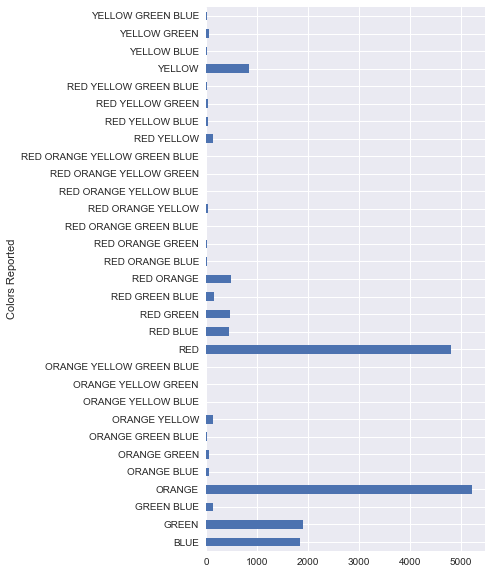

In [95]:
ufo.groupby(by='Colors Reported').size().plot(kind='barh', figsize=(5,10))

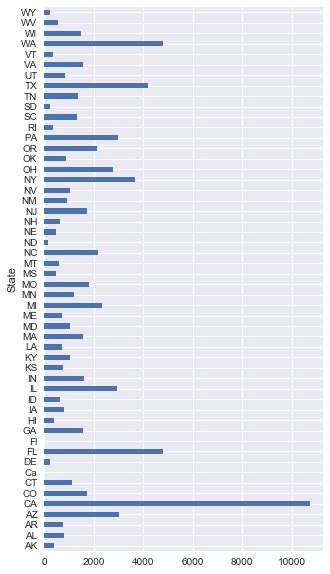

In [93]:
ufo.groupby(by='State').size().plot(kind='barh', figsize=(5,10))

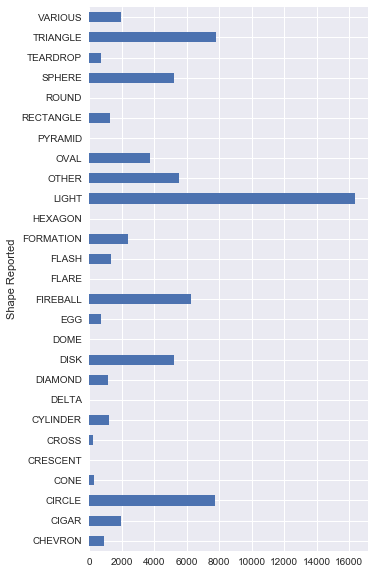

In [92]:
ufo.groupby(by='Shape Reported').size().plot(kind='barh', figsize=(5,10))

### 9. Plot counts of sightings per City

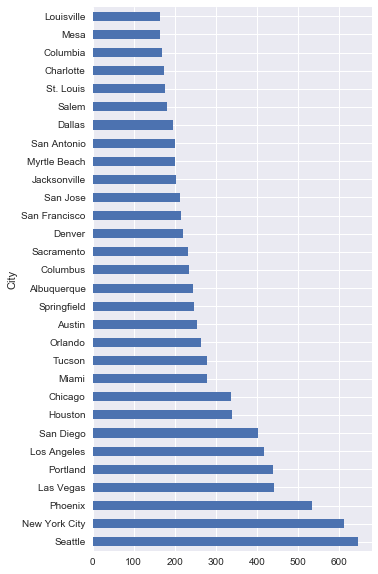

In [101]:
ufo.groupby(by='City').size().sort_values(ascending=False).ix[:30].plot(kind='barh', figsize=(5,10))

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

In [114]:
subset = ufo['City'].value_counts()
subset[subset > 300]

Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Los Angeles      416
San Diego        401
Houston          340
Chicago          337
Name: City, dtype: int64

In [102]:
ufo.groupby(by='City').size().sort_values(ascending=False)

City
Seattle                       646
New York City                 612
Phoenix                       533
Las Vegas                     442
Portland                      438
Los Angeles                   416
San Diego                     401
Houston                       340
Chicago                       337
Miami                         279
Tucson                        278
Orlando                       264
Austin                        254
Springfield                   246
Albuquerque                   244
Columbus                      235
Sacramento                    232
Denver                        219
San Francisco                 216
San Jose                      212
Jacksonville                  203
Myrtle Beach                  201
San Antonio                   201
Dallas                        195
Salem                         182
St. Louis                     175
Charlotte                     174
Columbia                      169
Mesa                          165
Louisvill

### 11.  Which cities have the most "CIGAR" sightings?

In [121]:
ufo[ufo['Shape Reported']=='CIGAR'].groupby(by='City')['Shape Reported'].count().sort_values(ascending=False).ix[:5]

City
New York City    19
Los Angeles      18
Phoenix          16
Seattle          14
Springfield      13
Name: Shape Reported, dtype: int64

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

In [129]:
ufo.groupby(by=['State','Shape Reported'])['City'].count().sort_values(ascending=False).ix[:20]

State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1022
WA     LIGHT             1016
CA     TRIANGLE           952
FL     LIGHT              915
TX     LIGHT              847
CA     FIREBALL           808
       DISK               773
       OTHER              749
       SPHERE             725
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              598
PA     LIGHT              581
OH     LIGHT              524
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               464
Name: City, dtype: int64

### 13.  Bonus:  What are the top 20 shapes by City + State?


In [128]:
ufo.groupby(by=['City','State'])['Time'].count().sort_values(ascending=False).ix[:20]

City           State
Seattle        WA       645
New York City  NY       611
Phoenix        AZ       526
Las Vegas      NV       432
Los Angeles    CA       413
San Diego      CA       399
Portland       OR       386
Chicago        IL       336
Houston        TX       336
Tucson         AZ       278
Miami          FL       266
Orlando        FL       262
Albuquerque    NM       243
Austin         TX       243
Sacramento     CA       232
San Francisco  CA       214
San Jose       CA       209
Denver         CO       208
San Antonio    TX       199
Myrtle Beach   SC       197
Name: Time, dtype: int64

### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    

In [135]:
ufo['Time'].head(20)

0       6/1/1930 22:00
1      6/30/1930 20:00
2      2/15/1931 14:00
3       6/1/1931 13:00
4      4/18/1933 19:00
5      9/15/1934 15:30
6       6/15/1935 0:00
7       7/15/1936 0:00
8     10/15/1936 17:00
9       6/15/1937 0:00
10     8/15/1937 21:00
11      6/1/1939 20:00
12     6/30/1939 20:00
13       7/7/1939 2:00
14      6/1/1941 13:00
15      7/2/1941 11:30
16      2/25/1942 0:00
17      6/1/1942 22:30
18      7/15/1942 1:00
19     4/30/1943 23:00
Name: Time, dtype: object

In [7]:
ufo['DateTime'] = pd.to_datetime(ufo['Time'], format='%m/%d/%Y %H:%M')

In [8]:
def get_hour(dtime):
    return dtime.hour

In [9]:
ufo['Hour'] = ufo['DateTime'].apply(get_hour)

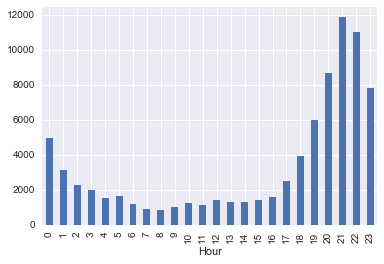

In [13]:
ufo.groupby(by='Hour').size().plot(kind='bar')

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art